In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/DITU/Desktop/Salary_Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


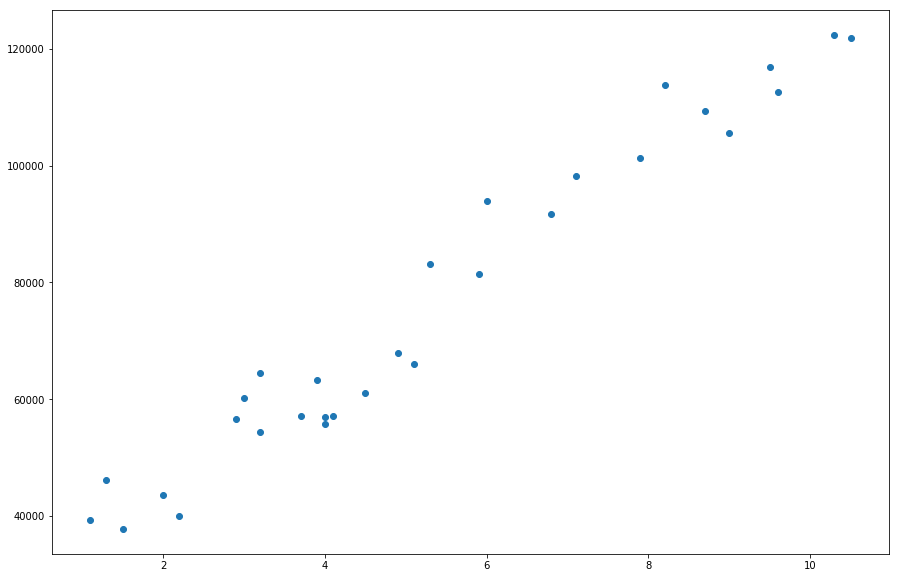

In [5]:
plt.figure(figsize = (15,10))
plt.scatter(df['YearsExperience'], df["Salary"])

In [6]:
X = df[['YearsExperience']]
y = df[['Salary']]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 1)

In [8]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [9]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
y_pred = lr.predict(X_test)

In [11]:
lr.coef_

array([[9158.13919873]])

In [12]:
lr.intercept_

array([26137.2400142])

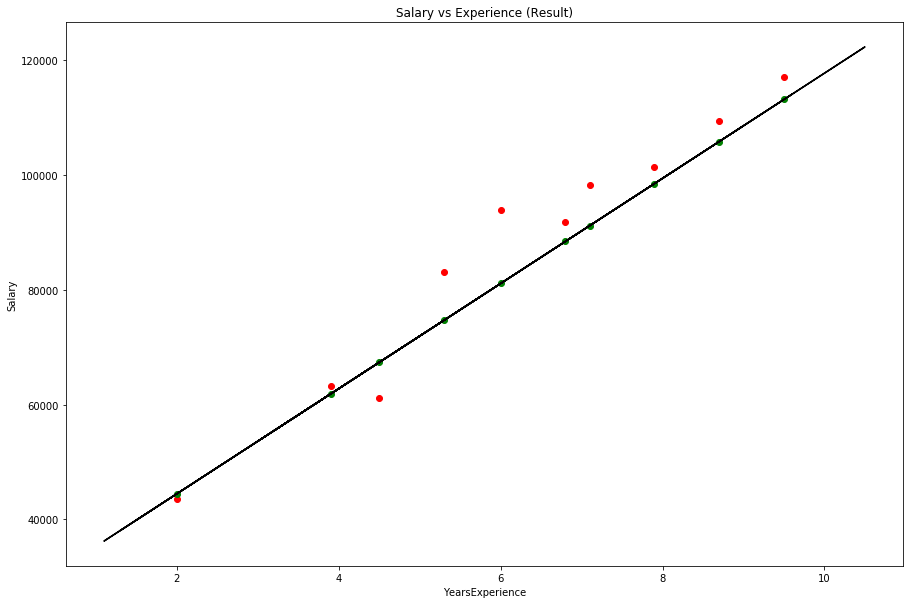

In [13]:
plt.figure(figsize = (15,10))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.plot(X_train, lr.predict(X_train), color = 'black')
plt.title('Salary vs Experience (Result)')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

In [14]:
import statsmodels.api as sm

X_stat = sm.add_constant(X_train)
regsummary = sm.OLS(y_train, X_stat).fit()
regsummary.summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     420.8
Date:                Wed, 01 Feb 2023   Prob (F-statistic):           6.21e-14
Time:                        11:08:02   Log-Likelihood:                -200.98
No. Observations:                  20   AIC:                             406.0
Df Residuals:                      18   BIC:                             408.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.614e+04   2548.831     10.255      0.000    2.08e+04    3.15e+04
YearsExperience  9158.1392    446.425     20.514      0.000    8220.234    1.01e+04
==============================================================================
Omnibus:                        1.816   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.523
Skew:                           0.613   Prob(JB):                        0.467
Kurtosis:                       2.430   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from sklearn.metrics import r2_score

r2_score(y_train, lr.predict(X_train))

0.9589827355323256